In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv("players_22.csv",low_memory=False)

In [3]:
players.head()


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features =["overall","potential","value_eur","wage_eur","age"]
players = players.dropna(subset=features)

In [5]:
data = players[features].copy()

In [6]:
data

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


# Pseudocode

High level 

Scale data to standardize values 

Initialize random centroids 

Get labels for each data point 

Create new centroids 

Plot the centroids 

Repeat 3-5 until the centroids stop changing 

In [7]:
data = ((data-data.min())/(data.max()-data.min()))*9+1

In [8]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


In [10]:
# defining   random centroid
def random_centroids(data,k):
    centroids=[]
    for i in range(k): 
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis="columns") #1 = "columns"| 0 = "axis"

In [11]:
centroids = random_centroids(data,5)

In [12]:
centroids

,0,1,2,3,4
overall,6.673913,4.913043,5.304348,6.478261,6.869565
potential,5.891304,7.065217,4.521739,3.934783,5.500000
value_eur,1.148043,1.083091,1.115567,1.045976,1.301143
wage_eur,1.002575,1.038627,1.012876,1.005150,1.090129
age,3.666667,6.000000,3.333333,3.000000,4.666667


In [13]:
def get_labels(data,centroids):
    distance = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    return distance.idxmin(axis=1)

In [14]:
labels = get_labels(data,centroids)
labels

0        4
1        4
2        4
3        4
4        4
        ..
19234    2
19235    2
19236    2
19237    2
19238    2
Length: 19165, dtype: int64

In [15]:
labels.value_counts()

2    11627
0     2940
4     2720
1     1878
dtype: int64

In [16]:
data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

,0,1,2,4
overall,5.886598,5.203452,3.746137,6.198627
potential,6.855673,4.806082,4.744351,5.864969
value_eur,1.309791,1.046096,1.035088,1.269435
wage_eur,1.416903,1.160790,1.048801,1.523536
age,3.204249,6.938038,3.250005,5.343449


In [17]:
def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [18]:
# visulazition
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [19]:
def plot_clusters(data,labels,centroids,iteration):
    pca = PCA(n_components=2)
    data_2d =pca.fit_transform(data)
    centroids_2d =pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0],y=  data_2d[:,1],c=labels)
    plt.scatter(x = centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()

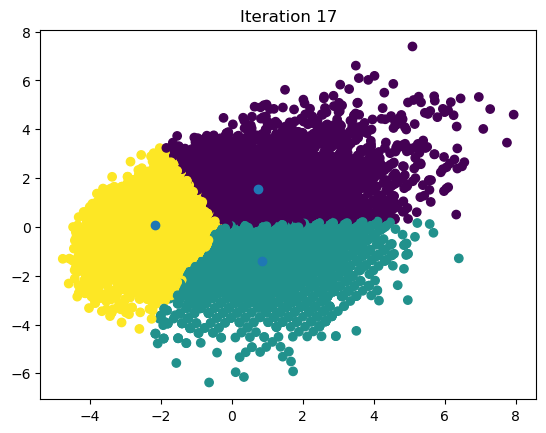

In [20]:
max_iteration = 100
k=3

centroids =random_centroids(data,k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels =get_labels(data,centroids)
    centroids = new_centroids(data,labels,k)
    plot_clusters(data,labels,centroids,iteration)
    iteration +=1

In [21]:
centroids

,0,1,2
overall,5.806043,4.784633,3.206838
potential,6.497993,4.506962,4.928473
value_eur,1.285501,1.044980,1.026614
wage_eur,1.420001,1.118904,1.028505
age,3.596161,5.472247,2.518708


In [22]:
players[labels==2][["short_name"]+features]

,short_name,overall,potential,value_eur,wage_eur,age
7025,Sandeiro Leal,68,68,1400000.0,7000.0,21
8028,Narcisso Mau,67,67,1100000.0,4000.0,21
8029,Botelhinonsa,67,67,1100000.0,4000.0,21
8030,Edenildo Lagoas,67,67,1100000.0,3000.0,21
8040,Dener Rolim,67,67,1200000.0,4000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,70000.0,1000.0,22
19235,C. Porter,47,59,110000.0,500.0,19
19236,N. Logue,47,55,100000.0,500.0,21
19237,L. Rudden,47,60,110000.0,500.0,19


In [23]:
# scikit implimnetaion

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(3)
kmeans.fit(data)

C:\Users\ABUTHALIB\.conda\envs\test\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [26]:
pd.DataFrame(kmeans.cluster_centers_,columns=features).T

,0,1,2
overall,6.232306,4.803121,3.600203
potential,6.625572,4.505849,5.204892
value_eur,1.414273,1.040096,1.035795
wage_eur,1.657772,1.113215,1.039968
age,4.138402,5.610089,2.713791


C:\Users\ABUTHALIB\.conda\envs\test\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ABUTHALIB\.conda\envs\test\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ABUTHALIB\.conda\envs\test\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ABUTHALIB\.conda\envs\test\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ABU

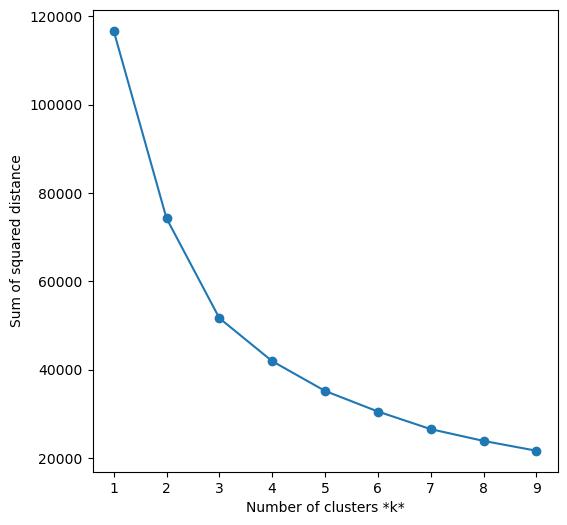

In [27]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');